In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from mpl_toolkits.mplot3d import Axes3D 
df=pd.read_csv('red.csv')
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [10]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [11]:
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [13]:
df1=df.corr('pearson')
df1


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [14]:
abs(df1['quality']).sort_values(ascending=False)


quality                 1.000000
alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed acidity           0.124052
pH                      0.057731
free sulfur dioxide     0.050656
residual sugar          0.013732
Name: quality, dtype: float64

In [15]:
print((df[['alcohol','volatile acidity','sulphates','citric acid']] == 0).sum())


alcohol               0
volatile acidity      0
sulphates             0
citric acid         132
dtype: int64


In [16]:
df[['citric acid']]=df[['citric acid']].replace(0,np.NaN)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,NaN,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,NaN,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,NaN,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,NaN,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,NaN,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [17]:
df.fillna(df.mean(), inplace=True)
df.shape
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.295358,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.295358,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.295358,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.295358,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.060000,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.295358,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.020000,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.360000,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [18]:
df1=df.corr('pearson')
df1


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.634530,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.481498,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.634530,-0.481498,1.000000,0.128656,0.212303,-0.074638,-0.021483,0.341003,-0.466802,0.300663,0.135312,0.210381
residual sugar,0.114777,0.001918,0.128656,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.212303,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.074638,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,-0.021483,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.341003,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.466802,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.300663,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [19]:
abs(df1['quality']).sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.210381
total sulfur dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed acidity           0.124052
pH                      0.057731
free sulfur dioxide     0.050656
residual sugar          0.013732
Name: quality, dtype: float64

In [20]:
data1=pd.DataFrame(df['alcohol'])
data2=pd.DataFrame(df['quality'])


final_data=pd.concat([data1,data2],axis=1)
final_data


,alcohol,quality
0,9.4,5
1,9.8,5
2,9.8,5
3,9.8,6
4,9.4,5
5,9.4,5
6,9.4,5
7,10.0,7
8,9.5,7
9,10.5,5


In [21]:
data1_min = np.array(data1)
X = (data1_min - data1_min.min()) / (data1_min.max() - data1_min.min())
data2_min = np.array(data2)
Y = (data2_min - data2_min.min()) / (data2_min.max() - data2_min.min())

print(f"Min value:\nAlcohol={X.min()}, quality={Y.min()}")

print(f"Max value:\nAlcohol={X.max()}, quality={Y.max()}")

Min value:
Alcohol=0.0, quality=0.0
Max value:
Alcohol=1.0, quality=1.0


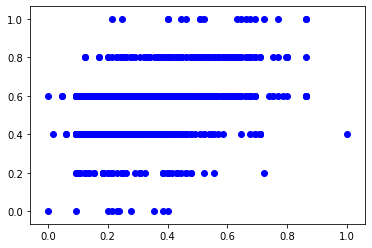

In [22]:
plt.scatter(X,Y,c='b')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

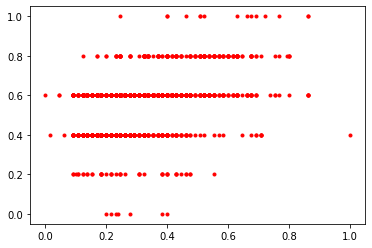

In [24]:
plt.plot(x_train, y_train, 'r.')

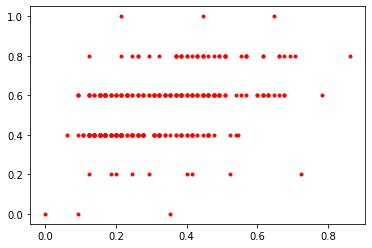

In [25]:
plt.plot(x_test, y_test, 'r.')

In [26]:
def hypothesis(a,b,x):
    return a * x  + b


def error(a,b,x,y):
    e = 0
    m = len(y)
    for i in range(m):
        e += np.power((hypothesis(a,b,x[i]) - y[i]), 2)
    
    return (1/(2 * m)) * e


def step_gradient(a,b,x,y,learning_rate):
    grad_a = 0
    grad_b = 0
    m = len(x)
    for i in range(m):
        grad_a += 1/m * (hypothesis(a,b,x[i]) - y[i]) * x[i]
        grad_b += 1/m * (hypothesis(a,b,x[i]) - y[i])
    
    a = a - (grad_a * learning_rate)
    b = b - (grad_b * learning_rate)
    
    return a, b


def descend(initial_a, initial_b, x, y, learning_rate, iterations):
    a = initial_a
    b = initial_b
    for i in range(iterations):
        e = error(a, b, x ,y)
        if i % 1000 == 0:
            print(f"Error: {e}, a: {a}, b: {b}")
        
        a, b = step_gradient(a, b, x, y, learning_rate)

    return a, b




Error: [0.12451916], a: 0, b: 1
Error: [0.01297639], a: [-0.00243677], b: [0.53209212]
Error: [0.01178545], a: [0.1012909], b: [0.49906926]
Error: [0.01106121], a: [0.18218157], b: [0.47332263]
Error: [0.01062078], a: [0.24526178], b: [0.45324487]
Error: [0.01035295], a: [0.29445304], b: [0.43758782]
Error: [0.01019008], a: [0.33281339], b: [0.42537813]
Error: [0.01009103], a: [0.36272759], b: [0.41585676]
Error: [0.0100308], a: [0.3860553], b: [0.4084318]
Error: [0.00999417], a: [0.40424674], b: [0.40264167]
[0.12451916]
[0.0099719]
[0.01068604]


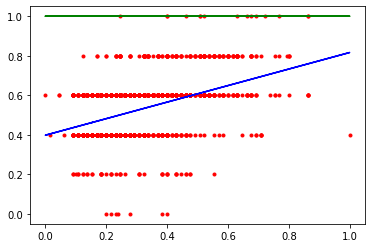

In [27]:
a = 0
b = 1
learning_rate = 0.01
iterations = 10000

final_a, final_b = descend(a, b, x_train, y_train, learning_rate, iterations)



print(error(a,b,x_train,y_train))
print(error(final_a, final_b, x_train, y_train))
print(error(final_a, final_b, x_test, y_test))



plt.plot(x_train, y_train, 'r.', x_train, hypothesis(a, b, x_train), 'g', x_train, hypothesis(final_a, final_b, x_train), 'b', )






IndexError: index 1 is out of bounds for axis 0 with size 1

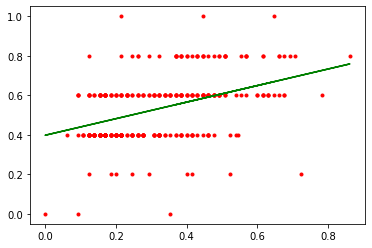

In [28]:
plt.plot(x_test, y_test, 'r.', x_test, hypothesis(final_a, final_b, x_test), 'g')






print(str((1-error(final_a, x_test, final_b, y_test))*100) + " %")


In [29]:
X1 = df['alcohol']
X2 = df['volatile acidity']
Y = df['quality']

# Normalizing the data
X1 = np.array((X1 - X1.min())-(X1.max() - X1.min()))
X2 = np.array((X2 - X2.min())-(X2.max() - X2.min()))
Y = np.array((Y - Y.min())-(Y.max() - Y.min()))


In [30]:
x1_train, x1_test, x2_train, x2_test, y_train, y_test = train_test_split(X1, X2, Y, test_size=0.2)


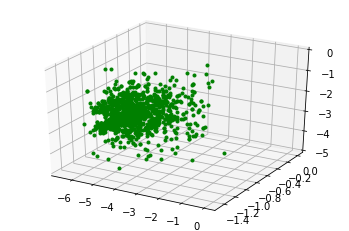

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x1_train, x2_train, y_train, 'g.')

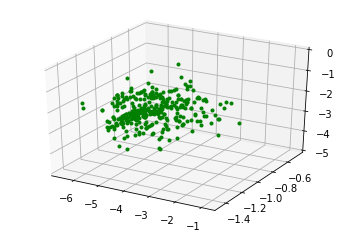

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x1_test, x2_test, y_test, 'g.')

In [33]:
def hypothesis(a,b,c,x1,x2):
    return a * x1 + b * x2 + c

In [34]:
def error(a,b,c,x1,x2,y):
    e = 0
    m = len(x1)
    for i in range(m):
        e += np.power((hypothesis(a,b,c,x1[i],x2[i]) - y[i]), 2)
    
    return (1/(2*m)) * e

In [35]:
def step_gradient(a,b,c,x1,x2,y,learning_rate):
    grad_a = 0
    grad_b = 0
    grad_c = 0
    m = len(x1)
    for i in range(m):
        grad_a += 2/m * (hypothesis(a,b,c,x1[i],x2[i]) - y[i]) * x1[i]
        grad_b += 2/m * (hypothesis(a,b,c,x1[i],x2[i]) - y[i]) * x2[i]
        grad_c += 2/m * (hypothesis(a,b,c,x1[i],x2[i]) - y[i])
        
    a = a - (grad_a * learning_rate)
    b = b - (grad_b * learning_rate)
    c = c - (grad_c * learning_rate)
    
    return a, b, c


def descend(initial_a, initial_b, initial_c, x1, x2, y, learning_rate, iterations):
    a = initial_a
    b = initial_b
    c = initial_c
    for i in range(iterations):
        e = error(a, b, c, x1, x2, y)
        if i % 1000 == 0:
            print(f"Error: {e}, a: {a}, b: {b}, c: {c}")
        
        a, b, c = step_gradient(a, b, c, x1, x2, y, learning_rate)

    return a, b, c


a = 0
b = 1
c = 1
learning_rate = 0.01
iterations = 10000

final_a, final_b, final_c = descend(a, b, c, x1_train, x2_train, y_train, learning_rate, iterations)

Error: 3.0732756939014765, a: 0, b: 1, c: 1
Error: 0.288397135177825, a: 0.506995025826662, b: 0.40866907891511295, c: 0.37685350278489793
Error: 0.2667606492857281, a: 0.4756063092235351, b: 0.03490754877287739, c: -0.16185422322601514
Error: 0.2527847004659839, a: 0.4465952065280732, b: -0.2550577870141223, c: -0.6017699796331469
Error: 0.24374684798140572, a: 0.42304903522046255, b: -0.4876277825605285, c: -0.9559186247376102
Error: 0.23790228968805394, a: 0.4041016711518555, b: -0.6746166144487475, c: -1.240733439084438
Error: 0.23412275658481213, a: 0.38886421732093684, b: -0.8249838076515273, c: -1.4697717942978827
Error: 0.23167862483633006, a: 0.37661080386803886, b: -0.9459031865832361, c: -1.6539556744982566
Error: 0.23009806452880888, a: 0.36675707924498374, b: -1.0431418784464506, c: -1.8020692478617222
Error: 0.22907595478073087, a: 0.35883309400333946, b: -1.1213374818127917, c: -1.9211764683917538


In [36]:
print(error(a, b, c, x1_train, x2_train, y_train))
print(error(final_a, final_b, final_c, x1_train, x2_train, y_train))
print(error(final_a, final_b, final_c, x1_test, x2_test, y_test))


3.0732756939014765
0.2284149813701346
0.205735371104126


In [37]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, x2_train, x2_test, y_train, y_test = train_test_split(X1, X2, Y, test_size=0.2)

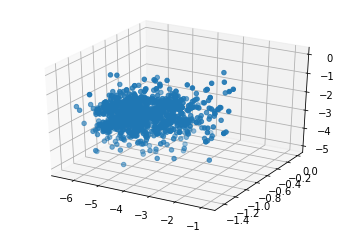

In [38]:
from mpl_toolkits import mplot3d
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.scatter3D(x1_train,x2_train,y_train,'r.')
plt.show()

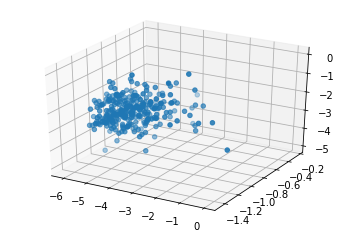

In [39]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.scatter3D(x1_test,x2_test,y_test,'r.')
plt.show()

Error: [0.69314718],a:[-0.0006027],b:[-0.0009795],c:[-0.00335]
Error: [0.60375929],a:[0.29976702],b:[0.02830225],c:[-0.86592106]
Error: [0.58283221],a:[0.7653871],b:[0.27477304],c:[-1.14883884]
Error: [0.56497671],a:[1.19126417],b:[0.5108994],c:[-1.40960387]
Error: [0.5497291],a:[1.57959878],b:[0.73578132],c:[-1.65288886]
Error: [0.53667764],a:[1.93402922],b:[0.95008496],c:[-1.87980692]
Error: [0.52546695],a:[2.2580348],b:[1.15447264],c:[-2.09154464]
Error: [0.51579712],a:[2.55482547],b:[1.34957565],c:[-2.28930568]
Error: [0.50741844],a:[2.82730004],b:[1.53598701],c:[-2.47425548]
Error: [0.50012454],a:[3.07804123],b:[1.71425901],c:[-2.64748937]


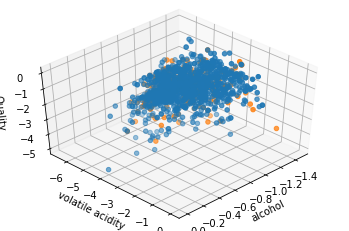

In [40]:
f=(final_a*x1_train)+(final_b*x2_train)+final_c
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.view_init(45,45)

ax.scatter3D(x2_train,x1_train,y_train,'red')
ax.scatter3D(x2_test,x1_test,y_test,'green')
ax.set_xlabel("alcohol")
ax.set_ylabel("volatile acidity")
ax.set_zlabel("Quality")
plt.show()

In [42]:
def hypothesis(a,b,c,x1,x2):
    return a * x1 + b * np.power(x2, 2) + c
def error(a,b,c,x1,x2,y):
    e = 0
    m = len(x1)
    for i in range(m):
        e += np.power((hypothesis(a,b,c,x1[i], x2[i]) - y[i]), 2)
    
    return (1/(2*m)) * e

In [43]:
def step_gradient(a,b,c,x1,x2,y,learning_rate):
    grad_a = 0
    grad_b = 0
    grad_c = 0
    m = len(x1)
    for i in range(m):
        grad_a += 1/m * (hypothesis(a,b,c,x1[i],x2[i]) - y[i]) * x1[i]
        grad_b += 1/m * (hypothesis(a,b,c,x1[i],x2[i]) - y[i]) * x2[i]
        grad_c += 1/m * (hypothesis(a,b,c,x1[i],x2[i]) - y[i])
        
    a = a - (grad_a * learning_rate)
    b = b - (grad_b * learning_rate)
    c = c - (grad_c * learning_rate)
    
    return a, b, c

In [44]:
def descend(initial_a, initial_b, initial_c, x, y, learning_rate, iterations):
    a = initial_a
    b = initial_b
    c = initial_c
    for i in range(iterations):
        e = error(a, b, c, x, y)
        if i % 1000 == 0:
            print(f"Error: {e}, a: {a}, b: {b}, c: {c}")
        
        a, b, c = step_gradient(a, b, c, x, y, learning_rate)

    return a, b, c


from sklearn.model_selection import train_test_split
x1_train, x1_test, x2_train, x2_test, y_train, y_test = train_test_split(X1, X2, Y, test_size=0.2)
a = 0
b = 1
c = 1
learning_rate = 0.5
iterations = 10000

final_a, final_b, final_c = descend(a, b, c, x1_train, x2_train, y_train, learning_rate, iterations)

TypeError: descend() takes 7 positional arguments but 8 were given